In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_expenses = pd.read_csv("/content/drive/MyDrive/세종시/data/25.세종시_가구_월평균_소비지출액.csv")
df_period = pd.read_csv("/content/drive/MyDrive/세종시/data/26.세종시_거주기간.csv")
df_income= pd.read_csv("/content/drive/MyDrive/세종시/data/27.세종시_월평균_가구소득.csv")

In [3]:
# df_expenses = df_expenses[20:25]

In [4]:
# df_income = df_income[20:25]

In [5]:
  df_period = df_period[18:23]

In [6]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   중분류           41 non-null     object 
 1   소분류           41 non-null     object 
 2   50만원 미만       41 non-null     float64
 3   50~100만원 미만   41 non-null     float64
 4   100~200만원 미만  41 non-null     float64
 5   200~300만원 미만  41 non-null     float64
 6   300~400만원 미만  41 non-null     float64
 7   400~500만원 미만  41 non-null     float64
 8   500~600만원 미만  41 non-null     float64
 9   600만원 이상      41 non-null     float64
dtypes: float64(8), object(2)
memory usage: 3.3+ KB


In [7]:
display(df_period)

,중분류,소분류,1년미만,1년~2년 미만,2년~4년 미만,4년~6년 미만,6년~10년 미만,10년 이상
18,직업별,사무,10.2,10.6,38.1,19.5,8.9,12.7
19,직업별,서비스판매,12.4,7.0,31.5,11.0,8.8,29.4
20,직업별,농어업,1.7,0.5,8.3,4.4,5.6,79.6
21,직업별,기능노무,9.1,8.4,22.7,10.8,7.6,41.4
22,직업별,군인/주부/학생/무직,9.1,9.7,34.1,13.7,7.7,25.7


In [8]:
del df_period["중분류"]

In [9]:
df_period['1년~4년미만'] = df_period['1년~2년 미만']+df_period['2년~4년 미만']
df_period = df_period.drop(['1년~2년 미만','2년~4년 미만'], axis=1)
display(df_period)

df_period['장기거주'] = df_period['4년~6년 미만']+df_period['6년~10년 미만']+df_period['10년 이상']
df_period = df_period.drop(['4년~6년 미만','6년~10년 미만','10년 이상'], axis=1)
display(df_period)

,소분류,1년미만,4년~6년 미만,6년~10년 미만,10년 이상,1년~4년미만
18,사무,10.2,19.5,8.9,12.7,48.7
19,서비스판매,12.4,11.0,8.8,29.4,38.5
20,농어업,1.7,4.4,5.6,79.6,8.8
21,기능노무,9.1,10.8,7.6,41.4,31.1
22,군인/주부/학생/무직,9.1,13.7,7.7,25.7,43.8


,소분류,1년미만,1년~4년미만,장기거주
18,사무,10.2,48.7,41.1
19,서비스판매,12.4,38.5,49.2
20,농어업,1.7,8.8,89.6
21,기능노무,9.1,31.1,59.8
22,군인/주부/학생/무직,9.1,43.8,47.1


In [11]:
df_period = df_period.set_index('소분류')

In [12]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

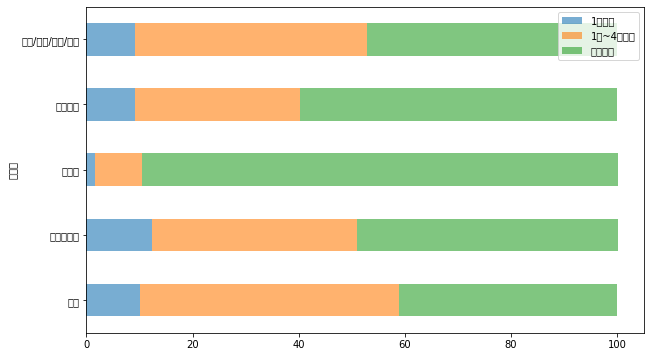

In [13]:
plt.rc('font', family='NanumBarunGothic')
df_period.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.6)

In [14]:
df_married = pd.read_csv("/content/drive/MyDrive/세종시/data/26.세종시_거주기간.csv")
df_married

,중분류,소분류,1년미만,1년~2년 미만,2년~4년 미만,4년~6년 미만,6년~10년 미만,10년 이상
0,전체,소계,10.3,9.6,33.5,13.9,8.3,24.4
1,읍·면·동별,조치원읍,9.3,6.1,9.1,8.6,10.2,56.7
2,읍·면·동별,면지역,8.8,3.6,9.4,5.9,5.4,66.9
3,읍·면·동별,동지역,11.0,12.1,46.0,17.4,8.6,5.0
4,성별,남자,10.8,10.1,32.8,13.5,7.9,24.9
5,성별,여자,9.8,9.1,34.3,14.3,8.6,23.9
6,연령별,13~19세,6.2,7.0,36.8,19.7,12.8,17.5
7,연령별,20~29세,24.5,11.7,33.5,7.6,4.7,18.1
8,연령별,30~39세,12.4,13.2,41.5,14.8,8.4,9.7
9,연령별,40~49세,7.6,7.5,41.4,16.7,9.6,17.1


In [15]:
df_married = df_married[23:26]
df_married

,중분류,소분류,1년미만,1년~2년 미만,2년~4년 미만,4년~6년 미만,6년~10년 미만,10년 이상
23,혼인상태별,미혼,16.1,8.1,31.6,13.5,8.4,22.3
24,혼인상태별,유배우,8.4,10.2,36.6,14.4,8.7,21.7
25,혼인상태별,사별/이혼,7.7,9.1,13.0,10.8,3.6,55.8


In [16]:
df_married['1년~4년미만'] = df_married['1년~2년 미만']+df_married['2년~4년 미만']
df_married = df_married.drop(['1년~2년 미만','2년~4년 미만'], axis=1)
df_married

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,중분류,소분류,1년미만,4년~6년 미만,6년~10년 미만,10년 이상,1년~4년미만
23,혼인상태별,미혼,16.1,13.5,8.4,22.3,39.7
24,혼인상태별,유배우,8.4,14.4,8.7,21.7,46.8
25,혼인상태별,사별/이혼,7.7,10.8,3.6,55.8,22.1


In [17]:
df_married['장기거주'] = df_married['4년~6년 미만']+df_married['6년~10년 미만']+df_married['10년 이상']
df_married = df_married.drop(['4년~6년 미만','6년~10년 미만','10년 이상'], axis=1)
df_married

,중분류,소분류,1년미만,1년~4년미만,장기거주
23,혼인상태별,미혼,16.1,39.7,44.2
24,혼인상태별,유배우,8.4,46.8,44.8
25,혼인상태별,사별/이혼,7.7,22.1,70.2


In [22]:
del df_married["중분류"]

In [23]:
df_married = df_married.set_index('소분류')
df_married


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

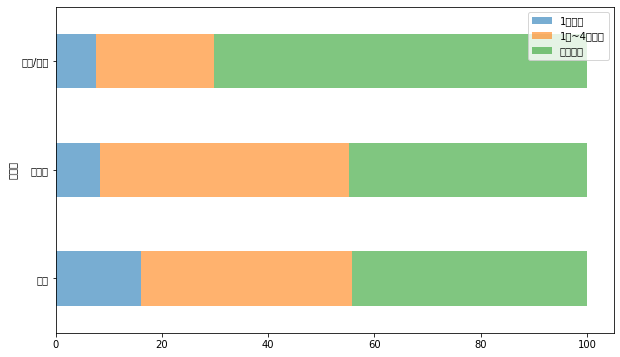

In [24]:
plt.rc('font', family='NanumBarunGothic')
df_married.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.6)